In [1]:
%matplotlib inline
from __future__ import division
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy
import seaborn
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['savefig.dpi'] = 150
seaborn.set_context({"figure.figsize": (16, 24)})

In [20]:
def plot_length_by_orient(species, name, axis, bins=numpy.linspace(2.5, 6.5, 25), xlab=True, ylab=True):
    data = pandas.read_table('../data/{}/{}.iloci.tsv'.format(species, species))
    iiLoci = data.loc[data.LocusClass == 'iiLocus']
    lengths = list()
    labels = ['FF', 'FR', 'RF', 'RR']
    for orient in labels:
        lengths.append(numpy.log10(iiLoci.loc[iiLoci.FlankGeneOrient == orient]['Length']))
    _ = axis.hist(lengths, stacked=True, bins=bins, color=seaborn.color_palette()[0:4])
    _ = axis.set_title(name)
    _ = axis.legend(labels=labels, loc='upper right')
    if xlab:
        _ = axis.set_xlabel('iiLocus Length (bp)')
    if ylab:
        _ = axis.set_ylabel('Frequency')
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])

In [21]:
def plot_bar(species, name, axis, xlab=True, ylab=True):
    data = pandas.read_table('../data/{}/{}.iloci.tsv'.format(species, species))
    iiLoci = data.loc[data.LocusClass == 'iiLocus']
    _ = iiLoci.FlankGeneOrient.value_counts().sort_index().plot.bar(ax=axis, color=seaborn.color_palette()[0:4])
    _ = axis.set_title(name)
    if xlab:
        _ = axis.set_xlabel('Flanking Gene Orientation')
    if ylab:
        _ = axis.set_ylabel('iiLocus Count')

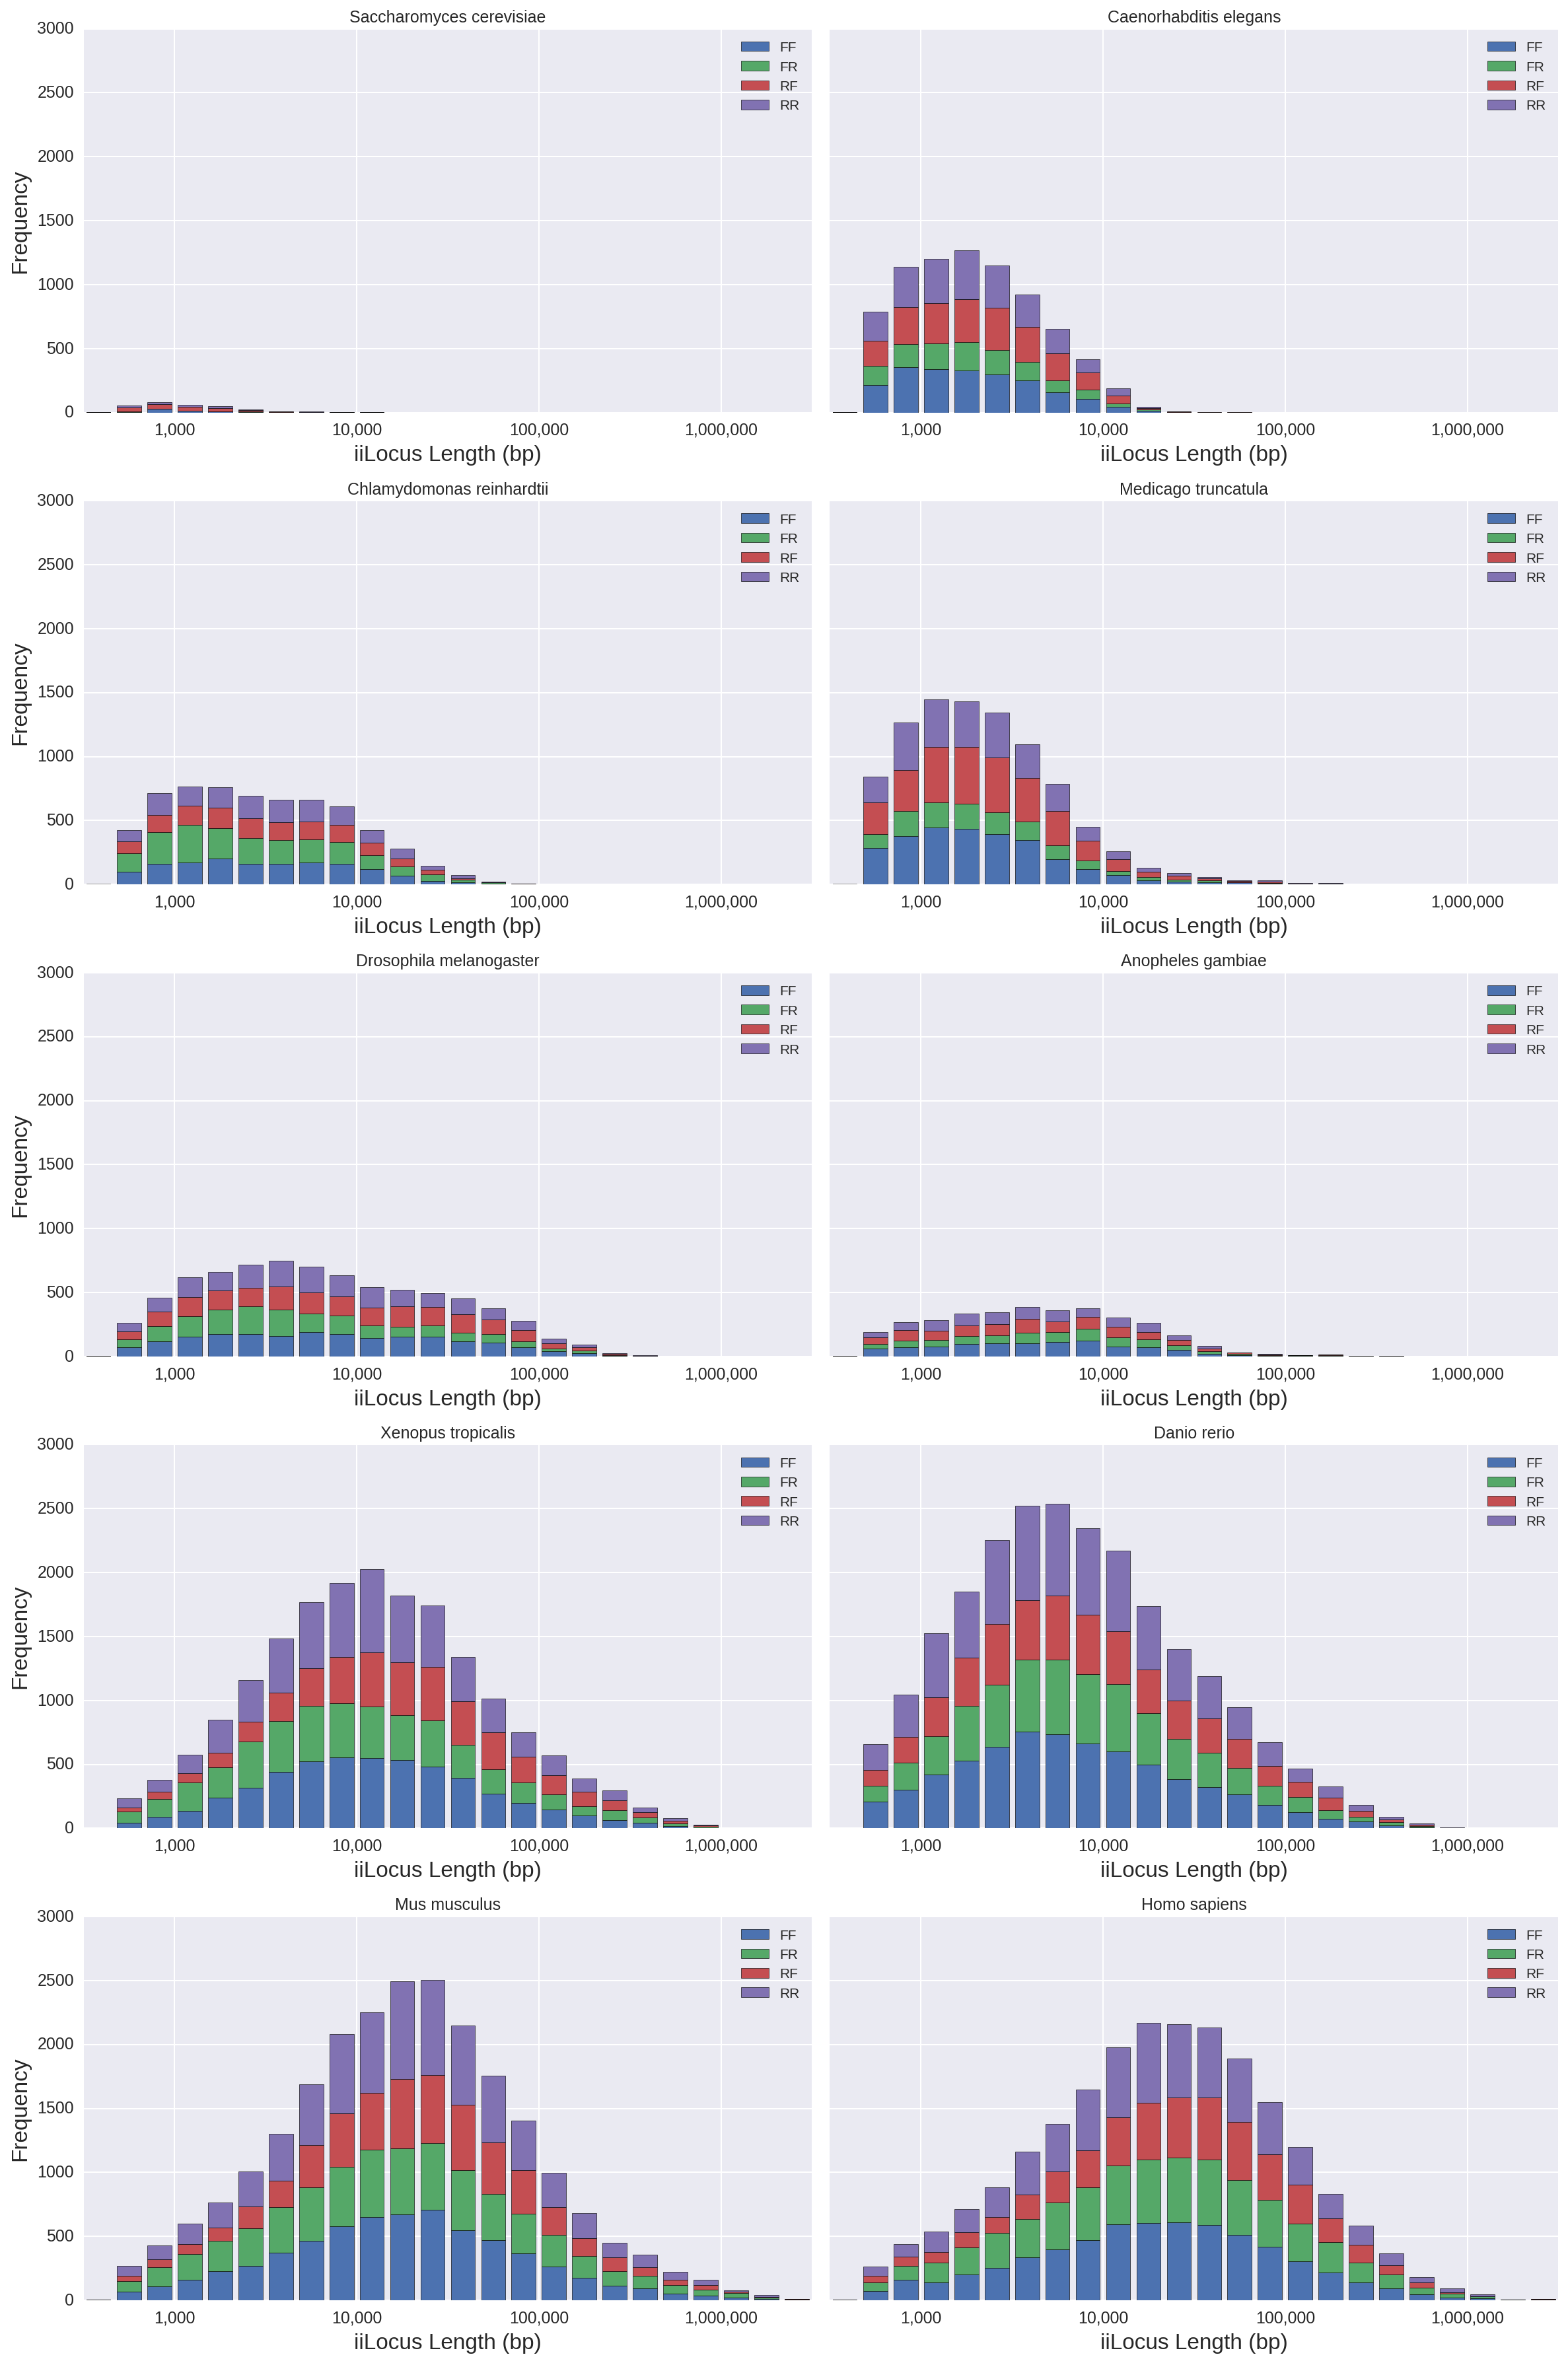

In [22]:
figure, axes = plt.subplots(5, 2, sharey=True)
axes = axes.ravel()
specieslist = ['Scer', 'Cele', 'Crei', 'Atha', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']

ylab = True
for (i, axis), species, name in zip(enumerate(axes), specieslist, speciesnames):
    plot_length_by_orient(species, name, axis, ylab=ylab)
    ylab = not ylab
figure.tight_layout()

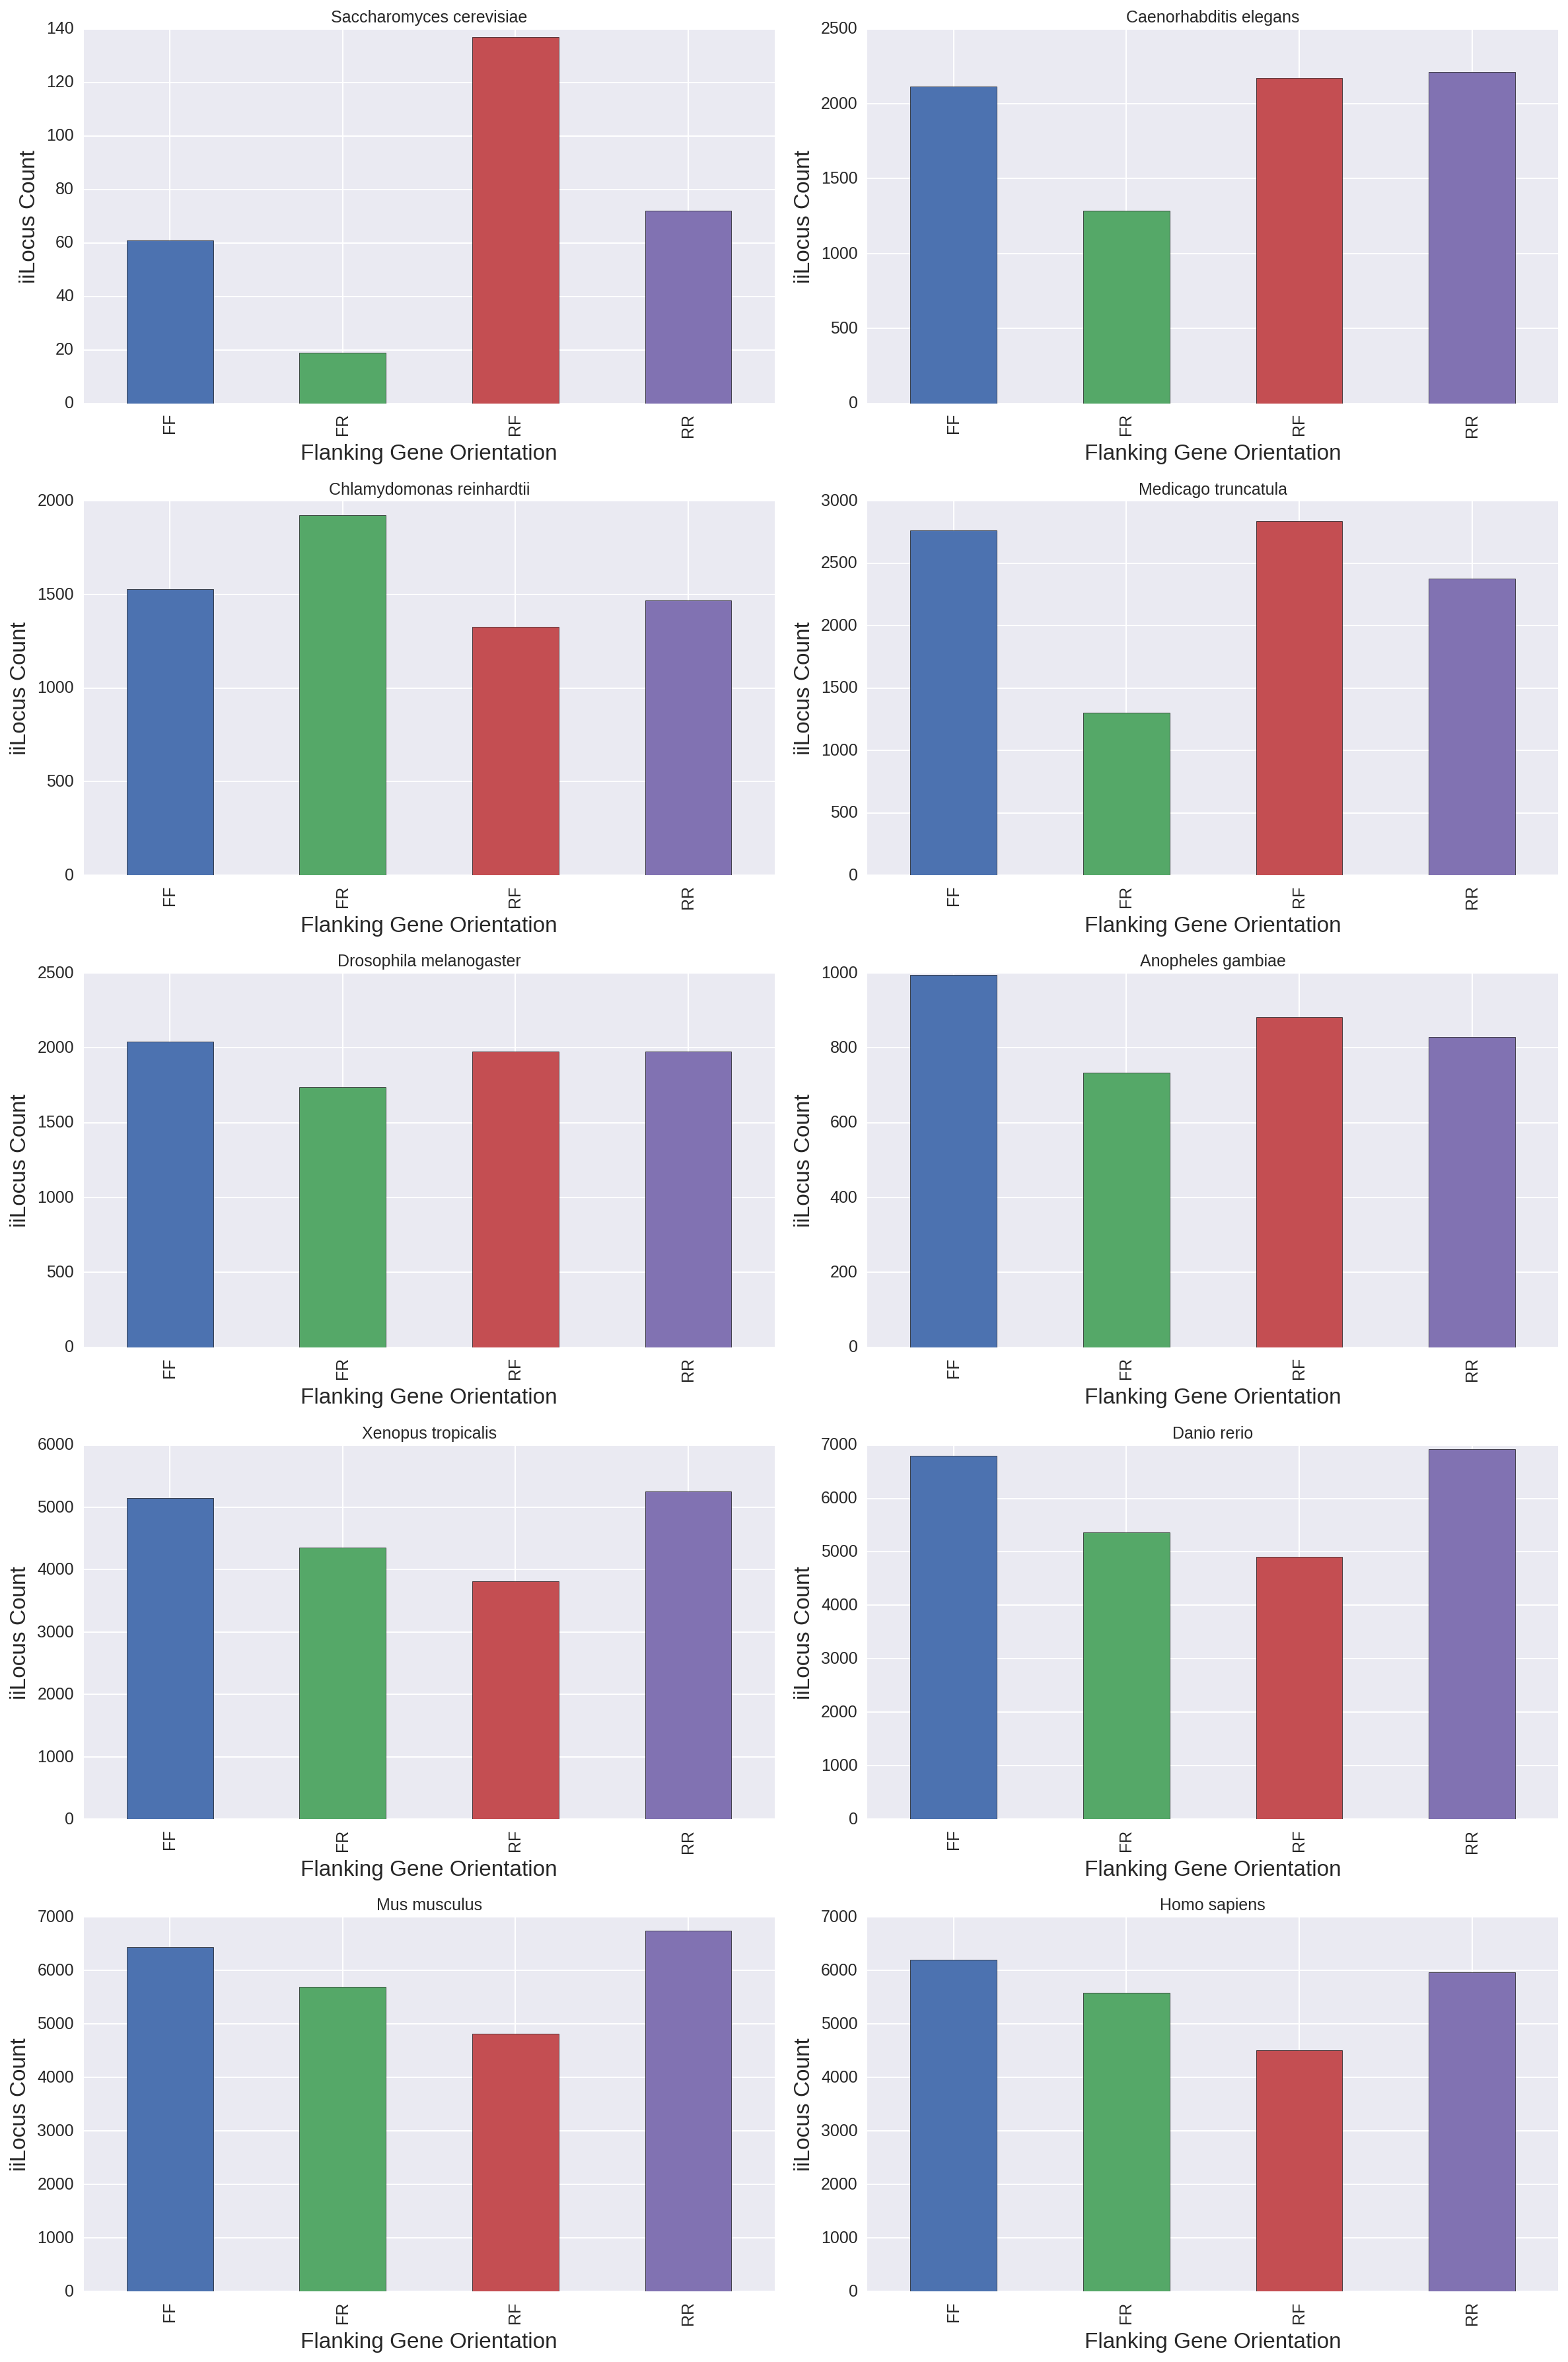

In [23]:
figure, axes = plt.subplots(5, 2, sharex=False, sharey=False)
axes = axes.ravel()
specieslist = ['Scer', 'Cele', 'Crei', 'Atha', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']

ylab = True
for (i, axis), species, name in zip(enumerate(axes), specieslist, speciesnames):
    plot_bar(species, name, axis)
    ylab = not ylab
figure.tight_layout()